In [1]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

# The below code's logic is okay but the font used for 'char' is not okay.. Its more like we need custom fontFace exactly whatever the font is used in the text of image! The "preprocessing" part is also not good yet.

In [2]:
def heightWidthImageOfChar(rows: int, cols: int, fontScale1: float) -> tuple[int]:
    rows += 5; cols += 5
    charImg = np.full((rows, cols), 255, dtype=np.uint16) # directly writing np.uint8 giving 23, 45, 123, 213 etc values but np.uint16 is giving only 0 and 255
    cv2.putText(charImg, char, (1, rows-2), cv2.FONT_HERSHEY_SIMPLEX, fontScale1, (0, 0, 0), 1, cv2.LINE_AA)

    pixelHeight, r1 = rows, None
    for row in range(rows):
        for col in range(cols):
            if charImg[row][col] == 0:
                r1 = row
                break
        if r1 != None:
            break
        pixelHeight -= 1
    
    r2 = None
    for row in range(rows-1, -1, -1):
        for col in range(cols):
            if charImg[row][col] == 0:
                r2 = row
                break
        if r2 != None:
            break
        pixelHeight -= 1
    
    # c1 and c2
    pixelWidth, c1 = cols, None
    for col in range(cols):
        for row in range(rows):
            if charImg[row][col] == 0:
                c1 = col
                break
        if c1 != None:
            break
        pixelWidth -= 1
    
    c2 = None
    for col in range(cols-1, -1, -1):
        for row in range(rows):
            if charImg[row][col] == 0:
                c2 = col
                break
        if c2 != None:
            break
        pixelWidth -= 1
    
    charImg = charImg[r1:r2+1, c1:c2+1] # modified charImg

    # plt.title(f"{rows-5}, {cols-5}")
    # plt.imshow(charImg, cmap='gray')
    #plt.show()
    # cv2.imshow(f"{rows-5}, {cols-5}", cv2.resize(charImg, (300, 300)))
    # cv2.waitKey(0)
    return (pixelHeight, pixelWidth, charImg)

def putText(ix: int, fx: int, fy: int, charHeight: int, charWidth: int, charImage) -> None:
    limit = (fx-2) // (charWidth+1) - 1
    for _ in range(limit):
        img[fy:fy + charHeight, ix:ix + charWidth] = charImage
        ix += charWidth + 1

def putText1(start: int, end: int, y3: int, fontscale: int, widthOfChar: int, numberOfChar: int) -> None:
    for _ in range(numberOf_char):
        cv2.putText(img, char, (start, y3), cv2.FONT_HERSHEY_SIMPLEX, fontscale, (0, 0, 0), 1, cv2.LINE_AA)
        start += widthOfChar

# selecting the final img
img  = cv2.imread("images/bfs.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_thrsehold = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=55, C=4.0)
threshold, black_and_white_img = cv2.threshold(grayImg, 92, 255, cv2.THRESH_BINARY_INV) # 89, 91, 92
img = black_and_white_img

# cropping the main information
box1: str = pytesseract.image_to_data(img, config=r'--psm 10 --oem 3')
x, y, w, h = map(int, box1.splitlines()[-1].split()[6:10]); i = 3
img = img[y-i:y+h+i, x-i:x+w+i] # cropping the main info
imgBox = img.copy()

# getting data from img
custom_config = r"-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz(){}[]0123456789!@#$%^&\*-\+=/><\?;:\"\' --psm 3"
box: str = pytesseract.image_to_data(img)

#print(box)
boxes = box.splitlines()
for row, line in enumerate(boxes):
    boxes[row] = boxes[row].split()


# Modify Line Number in boxes
row, size, curLineNum = 1, len(boxes), 1
while row < size:
    while row < size and len(boxes[row]) != 12:
        boxes[row][4], row = 0, row + 1

    if row >= size:
        break

    prevLineNum = int(boxes[row][4])
    while row < size and int(boxes[row][4]) == prevLineNum:
        boxes[row][4], row = curLineNum, row + 1
    curLineNum += 1

# Putting S
prevLine = -2

for lineNo, line in enumerate(boxes):
    if lineNo != 0 and len(line) == 12:
        curLine = int(line[4]); x1, y1, w, h = map(int, line[6:10])
        #cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 0, 0), 1)
        if prevLine == curLine:
            continue

        char = 'U' # MUST BE CAPITAL LETTER
        h = 10
        fontScale = cv2.getFontScaleFromHeight(cv2.FONT_HERSHEY_SIMPLEX, h, 1) # 0.42857142857142855 for pixelHeight = 15

        widthof_char, heightof_char = cv2.getTextSize(char, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=fontScale, thickness=1)[0]
        #print(f"h = {h}")
        #print(f"heightof_char = {heightof_char},   widthof_char = {widthof_char}")
        #calculatedHeight, calculatedWidth, charImg = heightWidthImageOfChar(heightof_char, widthof_char, fontScale)
        #print(f"calculatedHeight = {calculatedHeight},   calculatedWidth = {calculatedWidth}\n")
        
        #putText(1, x1, y1, calculatedHeight, calculatedWidth, charImg)
        numberOf_char = (x1-1) // (widthof_char) # (x1-2) // (widthof_char-1)
        putText1(start=1, end=x1, y3=y1+h-1, fontscale=fontScale, widthOfChar=widthof_char, numberOfChar = numberOf_char)
        # cv2.putText(img, char * numberOf_S, (1, y1+h-1), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0, 0, 0), 1, cv2.LINE_AA)
        prevLine = curLine                                     
        
        print(h, numberOf_char, line[-1])

img_to_string = pytesseract.image_to_string(img)
print('\n', img_to_string)
# print(box)
cv2.imwrite('Black and White Image.jpg', img)
cv2.imshow('Detection', img)
cv2.waitKey(0)

10 0 def
10 3 queue,
10 3 while
10 6 for
10 9 currentNode
10 9 print(currentNode,
10 9 for
10 12 if
10 15 queue.
10 15 visitedList.add(neighbourNode)

 def bfs(graph: dict, startNode: str) -> None:
UUUqueue, visitedList = deque([startNode]}, set([startNode])

UUUwhile queue:
UUUUUU for _ in range(len(queue)):
UUUUUUUUU currentNode = queue.popleft()
UUUUUUUUU print (currentNode, end=" *)

UUUUUUUUU for neighbourNode in (graph[currentNode] if currentNode in graph else []}
UUUUUUUUUUUU iF neighbourNode not in visitedList:

UUUUUUUUUUUUUUU Aueue. append{neighbourNade )

UUUUUUUUUUUUUUU visitedList.add(neighbourtode)



-1

In [7]:
textLines = img_to_string.splitlines()
firstChar = set([char])

for eachLine in textLines: # each line is a string like 'FFF if node not in graph:' or ''
    for ch in eachLine:
        if ch in firstChar:
            print(' ', end='')
        else:
            print(ch, end='')
            firstChar = set()

    print()
    firstChar = set([char])

def bfs(graph: dict, startNode: str) -> None:
   dueue, visitedList = deque([startNode]}, set([startNode])

   while queue:
       for _ in range(len(queue)):
          currenthode = queue.popleft()
          print (currentNode, end=" *)

          for neighbourNode in (graph[currentNode] if currentNode in graph else []}
             if neighbourNode not in visitedList:

                queue. append{neighbourNode )

                visitedList.add(neighbourtode)


#                                                    Detect Each Line

In [4]:
# selecting the final img
img  = cv2.imread("images/random1.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_thrsehold = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=55, C=4)
threshold, black_and_white_img = cv2.threshold(grayImg, 89, 255, cv2.THRESH_BINARY_INV) # 89 - 92
img = adaptive_thrsehold

# cropping the main information (its not trustworthy)
box: str = pytesseract.image_to_data(img, config=r'--psm 10 --oem 3')
x, y, w, h = map(int, box.splitlines()[-1].split()[6:10]); i = 2
img = img[y-i:y+h+i, x-i:x+w+i] # cropping the main info


# getting data from img
custom_config = r"-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz(){}[]0123456789!@#$%^&\*-\+=/><\?;:\"\' --psm 3"
box: str = pytesseract.image_to_data(img, config=custom_config)

# drawing bounding box on each line
for lineNo, line in enumerate(box.splitlines()):
    line = line.split()
    if lineNo != 0 and len(line) == 12:
        x1, y1, w, h = map(int, line[6:10])
        cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 0, 0), 1, cv2.LINE_AA)

#print(pytesseract.image_to_string(img))
print(box)
cv2.imwrite('Detect Each Line.jpg', img)
cv2.imshow('Detection', img)
cv2.waitKey(0)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	459	241	-1	
2	1	1	0	0	0	64	6	354	44	-1	
3	1	1	1	0	0	64	6	354	44	-1	
4	1	1	1	1	0	64	6	354	44	-1	
5	1	1	1	1	1	64	6	354	44	0.000000	HasibulHabib
2	1	2	0	0	0	6	121	453	30	-1	
3	1	2	1	0	0	6	121	453	30	-1	
4	1	2	1	1	0	6	121	453	30	-1	
5	1	2	1	1	1	6	121	453	30	0.000000	123456192056189
2	1	3	0	0	0	105	188	242	23	-1	
3	1	3	1	0	0	105	188	242	23	-1	
4	1	3	1	1	0	105	188	242	23	-1	
5	1	3	1	1	1	105	188	242	23	0.000000	HmmmMaybemaybe



-1

In [20]:
# selecting the final img
img  = cv2.imread("Black and White Image.jpg")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_thrsehold = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=55, C=4)
threshold, black_and_white_img = cv2.threshold(grayImg, 89, 255, cv2.THRESH_BINARY_INV) # 89 - 92
img = adaptive_thrsehold

# cropping the main information (its not trustworthy)
# box: str = pytesseract.image_to_data(img, config=r'--psm 10 --oem 3')
# x, y, w, h = map(int, box.splitlines()[-1].split()[6:10]); i = 2
# img = img[y-i:y+h+i, x-i:x+w+i] # cropping the main info


# getting data from img
box: str = pytesseract.image_to_data(img)

# drawing bounding box on each line
for lineNo, line in enumerate(box.splitlines()):
    line = line.split()
    if lineNo != 0 and len(line) == 12:
        x1, y1, w, h = map(int, line[6:10])
        cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 0, 0), 1, cv2.LINE_AA)

#print(pytesseract.image_to_string(img))
cv2.imwrite('Detect Space.jpg', img)
print(box)
cv2.imshow('Detection', img)
cv2.waitKey(0)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	449	171	-1	
2	1	1	0	0	0	1	3	445	68	-1	
3	1	1	1	0	0	2	3	444	33	-1	
4	1	1	1	1	0	3	3	443	13	-1	
5	1	1	1	1	1	3	3	22	10	92.811531	def
5	1	1	1	1	2	33	3	74	13	92.623093	dfs(graph:
5	1	1	1	1	3	118	3	36	12	93.304794	dict,
5	1	1	1	1	4	164	3	90	10	84.904434	visitedList:
5	1	1	1	1	5	265	4	27	11	96.788490	set,
5	1	1	1	1	6	303	3	35	10	87.613541	node:
5	1	1	1	1	7	349	3	29	13	76.574402	str)
5	1	1	1	1	8	389	5	13	8	92.982330	->
5	1	1	1	1	9	411	4	35	9	95.710030	None:
4	1	1	1	2	0	2	21	183	15	-1	
5	1	1	1	2	1	2	21	22	15	88.368164	$$
5	1	1	1	2	2	34	22	81	13	84.421371	print(node,
5	1	1	1	2	3	126	22	30	10	67.504021	end="
5	1	1	1	2	4	175	22	10	13	0.000000	*)
3	1	1	2	0	0	1	40	191	14	-1	
4	1	1	2	1	0	1	40	191	14	-1	
5	1	1	2	1	1	1	40	26	12	91.481941	$$$
5	1	1	2	1	2	34	41	14	10	93.549332	if
5	1	1	2	1	3	57	41	29	10	93.549332	node
5	1	1	2	1	4	96	42	21	9	92.451935	not
5	1	1	2	1	5	126	41	14	10	92.451935	in
5	1	1	2	1	6	149	

-1

#                               Covert any image to Black Background and White Text

In [13]:
import cv2
import numpy as np

img  = cv2.imread("black BG white text.png")
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_thrsehold = cv2.adaptiveThreshold(grayImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=55, C=4)
threshold, black_and_white_img = cv2.threshold(grayImg, 89, 255, cv2.THRESH_BINARY_INV) # 89 - 92
img = adaptive_thrsehold

cv2.imshow('AAAAAA', img)
cv2.waitKey(0)

-1

import cv2
import numpy os np

OriginalImoge = cv2.imread(“Restore-Danaged-Photo/abrsaham. jpg”)
cv2.imshoa("Origina limage™,OriginaliInage)

nakredDamages = cv2.imread(“Restore-Damaged-Photo/mask.jpg”,@) ® gray scale
cv2.imshon(“makred Damages” ,makredDamages )

& lets create a mask with threshhold
ret , thresh = cv2.threshold(makredDamages, 254, 255 , cv2.THRESH_BINARY)
cv2.imshon(“mask threshold”, thresh)

) lets make the lines thicker

kernel = np.ones((7,7), np-uint8)

mask = cv2.dilate(thresh , kernel , iterations=1)
cv2.imshon("mask", mask)

§ lets restore the image

restoredImnge = cv2.inpaint(Originolimage , mask , 3, cv2-INPAINT_TELEA)
cv2.imshow("restored Image", restoredImage)

cv2. imrite(" Restore-Damaged-Photo/RestoredAbraham. jpg’ * ,restoredImagd)|

cv2.waitKey(@)
 



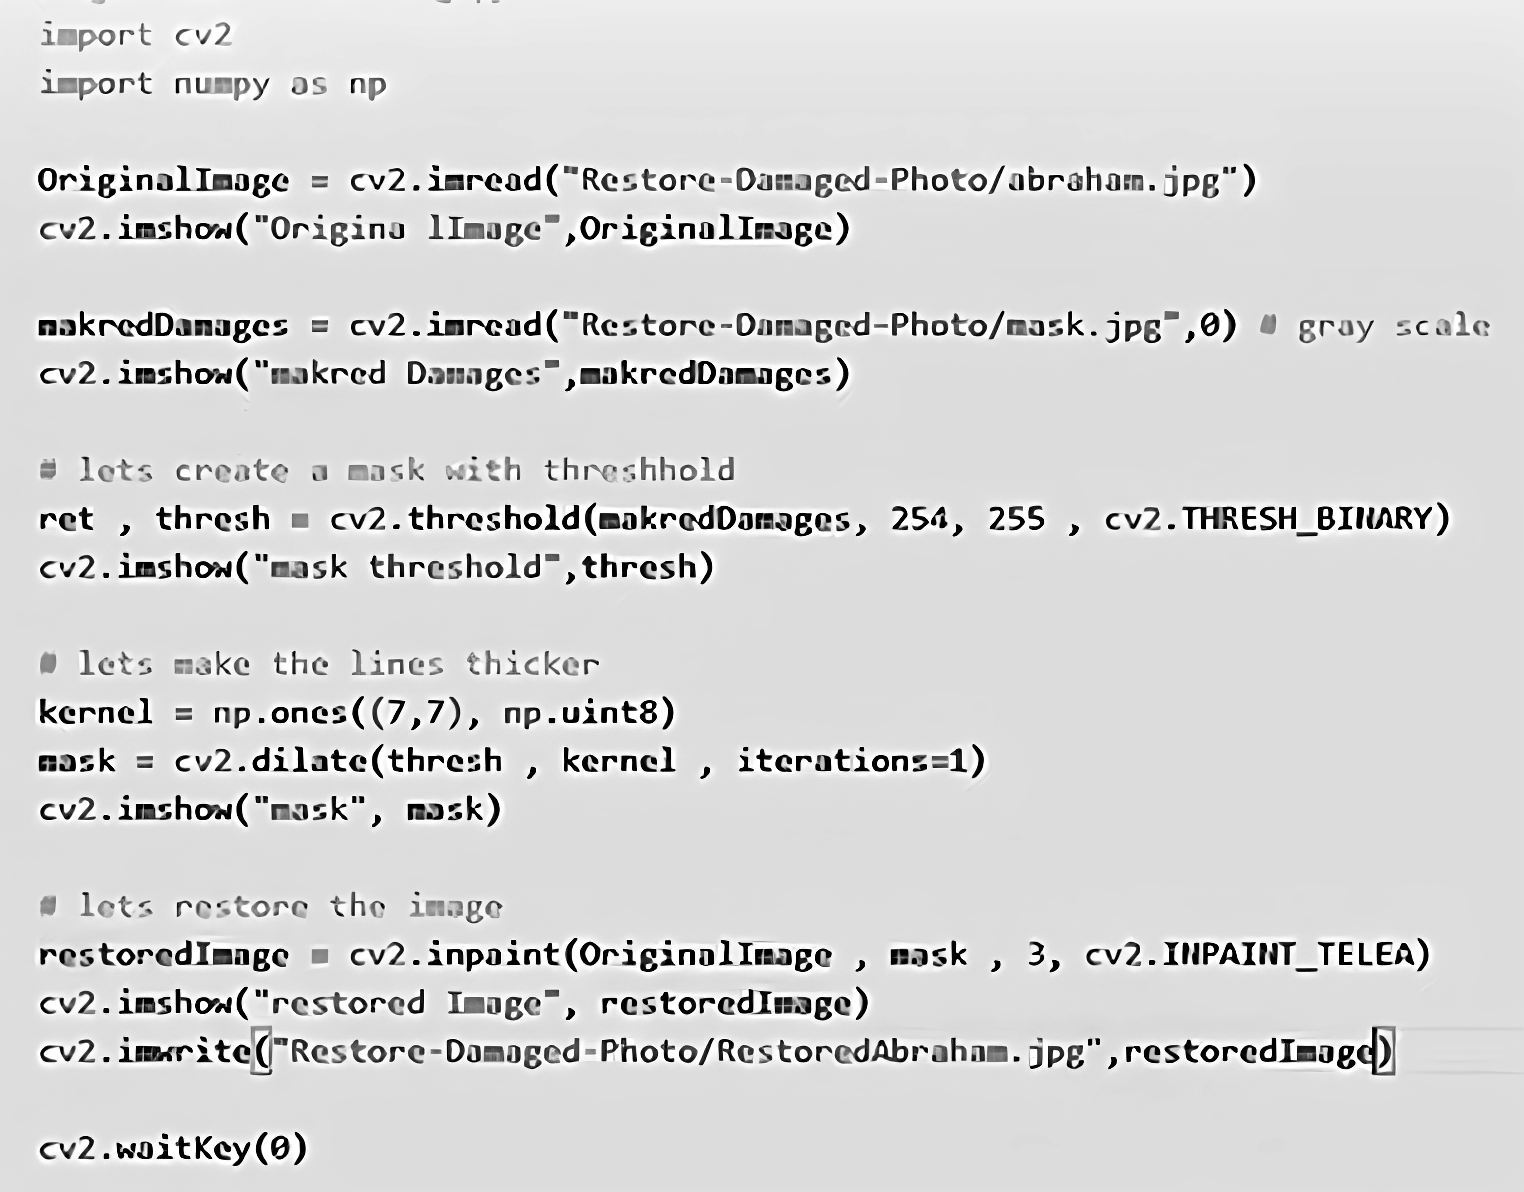

In [15]:
from PIL import Image, ImageOps
import PIL
import numpy
import pytesseract
import cv2

img = Image.open("codes1.png").convert('RGB')

r, g, b = img.split()

# img = Image.merge('RGB', (
#     r,
#     g.point(lambda i: i * 3),  # brighten green channel
#     b,
# ))
    # ImageOps.autocontrast(ImageOps.invert(ImageOps.grayscale(img)), 2)
img = ImageOps.autocontrast(ImageOps.invert(ImageOps.grayscale(img)), 2) # its giving better result in pytesseract.image_to_string
img.save('black BG white text.png')
# pil_data = PIL.Image.open('black BG white text.png')#.convert('RGB'), without " .convert('RGB' ", its Gray Image

# cv2Img is a gray image as img is gray.
# cv2Img = numpy.array(img)#[:, :, ::-1].copy() # cv2 version
# copyImg = cv2Img.copy()
# pilImg = cv2.cvtColor(cv2Img, cv2.COLOR_BGR2GRAY)
# print(set(c for row in pilImg for c in row))
# grayimg = cv2.cvtColor(cv2Img, cv2.COLOR_BGR2GRAY)
# _, cv2BWImg = cv2.threshold(cv2Img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# custom_config = r"-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz(){}[]0123456789!@#$%^&\*-\+=/><\?;:\"\' --psm 3"
# box: str = pytesseract.image_to_data(img, config=custom_config)

# drawing bounding box on each line
# for lineNo, line in enumerate(box.splitlines()):
#     line = line.split()
#     if lineNo != 0 and len(line) == 12:
#         x1, y1, w, h = map(int, line[6:10])
#         cv2.rectangle(cv2Img, (x1, y1), (x1 + w, y1 + h), (255, 255, 255), -1, cv2.LINE_AA)

# print(pytesseract.image_to_string(cv2Img), '\n') # CV2
# print('------------------------------------\n')
print(pytesseract.image_to_string(img), '\n') # PIL
# cv2.imshow('PIL', pilImg)
# cv2.imshow('CV2', cv2Img)
# cv2.waitKey(0)

# gray = 255 - cv2.imread("images/bfs.jpg", cv2.IMREAD_GRAYSCALE)
# print(pytesseract.image_to_string(copyImg))
# cv2.imshow('cv2 image', gray)
# cv2.waitKey(0)

# cv2.imshow('cv2 image', cv2Img)
# cv2.waitKey(0)

# print(set(c for row in cv2Img for c in row))
img

In [7]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('images/bfs1.jpg')
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(grayimg, 100, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('Black BG White Text', grayimg)
cv2.imshow('Black BG White Tex', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()